In [7]:
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image as Image
import tensorflow as tf
#import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)

seed = 123
tf.keras.utils.set_random_seed(
    seed
)

TensorFlow version: 2.13.0


In [8]:
import pathlib
archive = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants'
data_dir = pathlib.Path(archive).with_suffix('')

In [9]:
archive

'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants'

In [10]:
data_dir

WindowsPath('C:/Users/jboak/Dropbox/SynchronizeWork/Datasets/plants')

In [11]:
# Data cleaning and aquiring data
# Use batch image downloader Fatkun. 
# To populate the wilted category, we search the key words "house plant", "healthy house plant", and "indoor plant"
# The population in the healthy category is 166.
# To populate the wilted category, we search the key words "wilted house plant", "wilted indoor plant", and "droopy house plant"
# The population in the wilted category is 148.


# As a first pass at cleaning the data set, we require the image to: 
# show a full, clear view of the plant (not just leaves or trunk)
# no more than three plants in the image
# mostly matured plants (no seedlings)
# images of real plants (no drawings)
# variety of house plants (including succulents, ivies, woody trunked)
# allowing distractions (humans, various pot types, different points of view, plant not in center of the image)
# For healthy category: the image only has healthy plants (no mixture of sick and healthy)
# For wilted category: allow a mixture of sick and healthy


# As a second pass at cleaning the data, we remove links that are broken
# Check the image has correct file formatting (only allow .jpg, convert file type when necessary)
# Remove duplicate images (same file name)



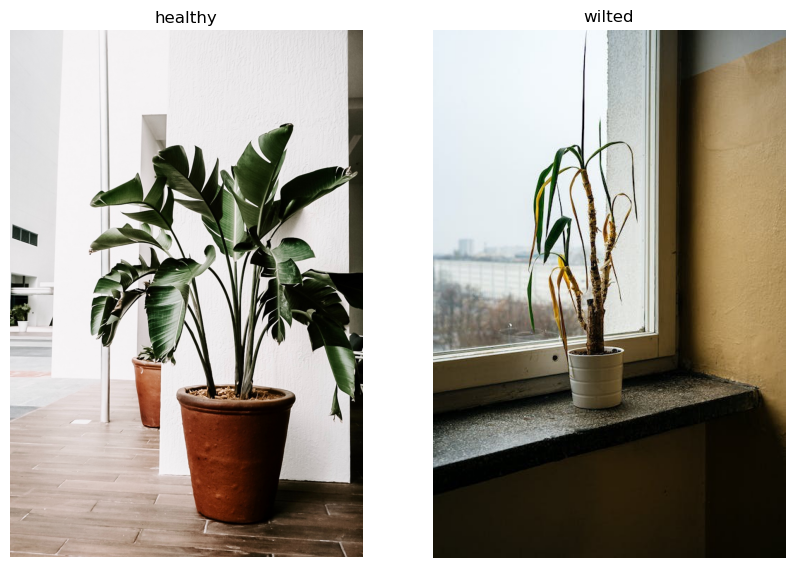

In [12]:
# Example "healthy" due to Julia Kuzenkov 
# (creative commons license) Green Indoor Plants
# https://www.pexels.com/photo/green-indoor-plants-1974508/

# Example "wilted" due to Syn Gor
# (creative commons license) A Wilting Plant on the Windowsill
# https://www.pexels.com/photo/a-wilting-plant-on-the-windowsill-10651660/

plt.figure(figsize=(10, 10))

file = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants\\healthy\\pexels-julia-kuzenkov-1974508.jpg'

with PIL.Image.open(file) as im:
    ax = plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.title('healthy')
    plt.axis("off")
    
file2 = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants\\wilted\\pexels-photo-10651660.jpg'

with PIL.Image.open(file2) as im2:
    ax = plt.subplot(1, 2, 2)
    plt.imshow(im2)
    plt.title('wilted')
    plt.axis("off")


In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


288


In [14]:
batch_size = 32
img_height = 180
img_width = 180

In [15]:
2+2

4

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 288 files belonging to 2 classes.
Using 231 files for training.
